In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_state = 42
np.random.seed(random_state)

In [2]:
X_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
delimiter = ','
X0 = pd.read_csv(X_url, delimiter=delimiter)
X0.shape

(440, 8)

In [3]:
X0.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


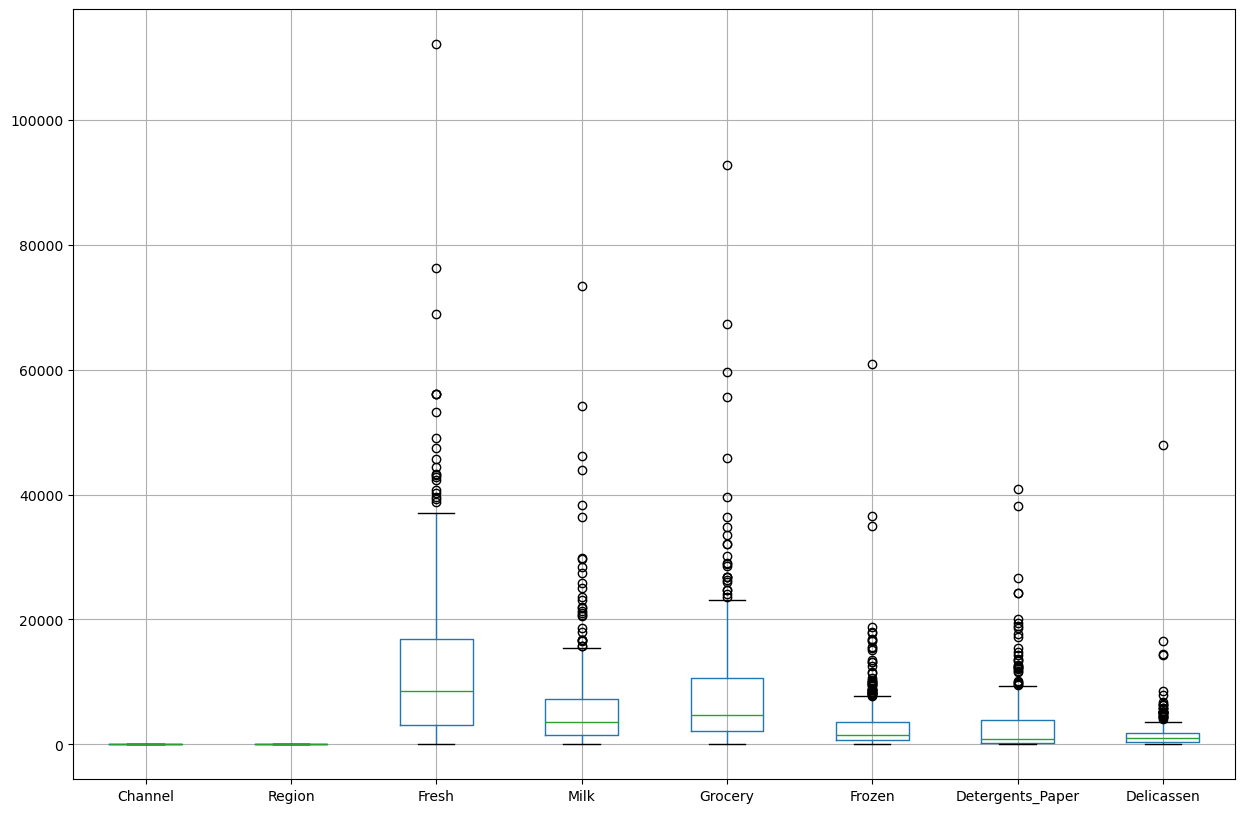

In [4]:
X0.boxplot(figsize=(15,10));

In [5]:
import seaborn as sns
sns.pairplot(X0);

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_pt = pd.DataFrame(pt.fit_transform(X0.iloc[:,2:]),columns=X0.columns[2:])
X_pt.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.413012,0.979454,0.394901,-1.457973,0.620530,0.338074
1,-0.110911,0.995243,0.628376,0.080081,0.751556,0.602222
2,-0.195814,0.888063,0.410688,0.332499,0.793104,2.240051
3,0.458126,-0.965336,-0.154740,1.173953,-0.372736,0.608674
4,1.028870,0.412660,0.346961,0.742061,0.367767,1.737333


In [10]:
X_trasf = pd.concat([X0.iloc[:,:2],X_pt],axis=1)

X_trasf.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.413012,0.979454,0.394901,-1.457973,0.620530,0.338074
1,2,3,-0.110911,0.995243,0.628376,0.080081,0.751556,0.602222
2,2,3,-0.195814,0.888063,0.410688,0.332499,0.793104,2.240051
3,1,3,0.458126,-0.965336,-0.154740,1.173953,-0.372736,0.608674
4,2,3,1.028870,0.412660,0.346961,0.742061,0.367767,1.737333


In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X_trasf), columns = X_trasf.columns)
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.501828,0.667606,0.625238,0.208640,0.649941,0.412016
1,1.0,1.0,0.414266,0.670028,0.655690,0.458800,0.674852,0.445663
2,1.0,1.0,0.400077,0.653586,0.627297,0.499856,0.682752,0.654292
3,0.0,1.0,0.509368,0.369264,0.553550,0.636716,0.461095,0.446485
4,1.0,1.0,0.604755,0.580657,0.618985,0.566470,0.601884,0.590255


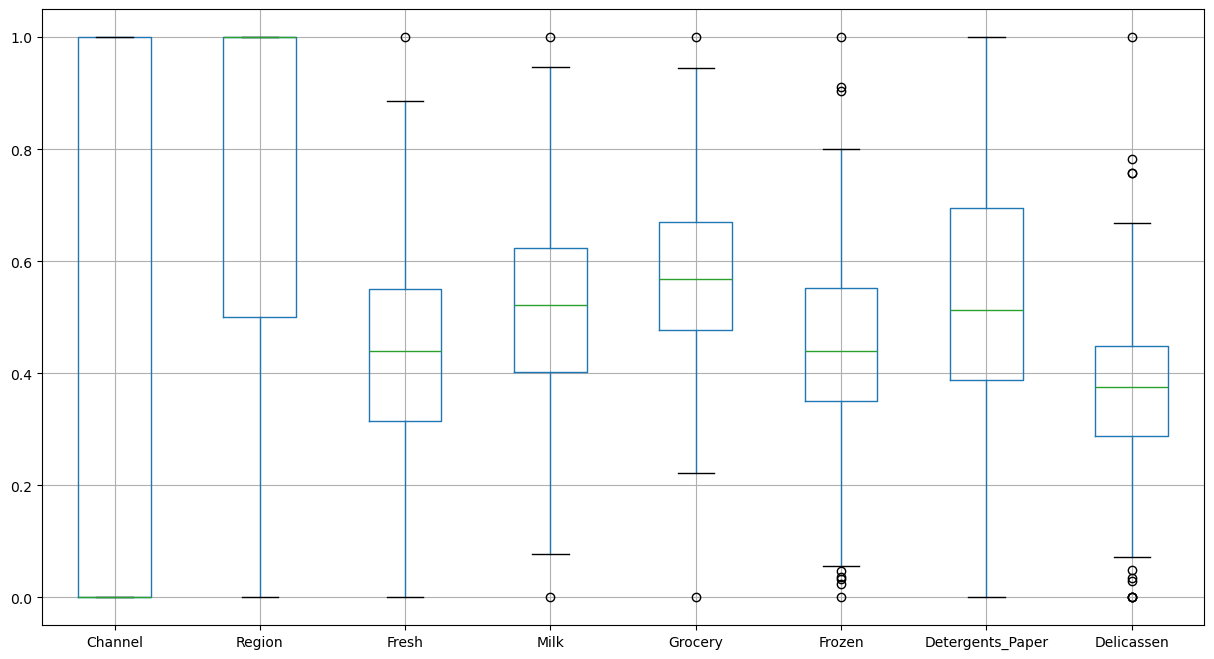

In [14]:
X.boxplot(figsize=(15,8));
plt.show()

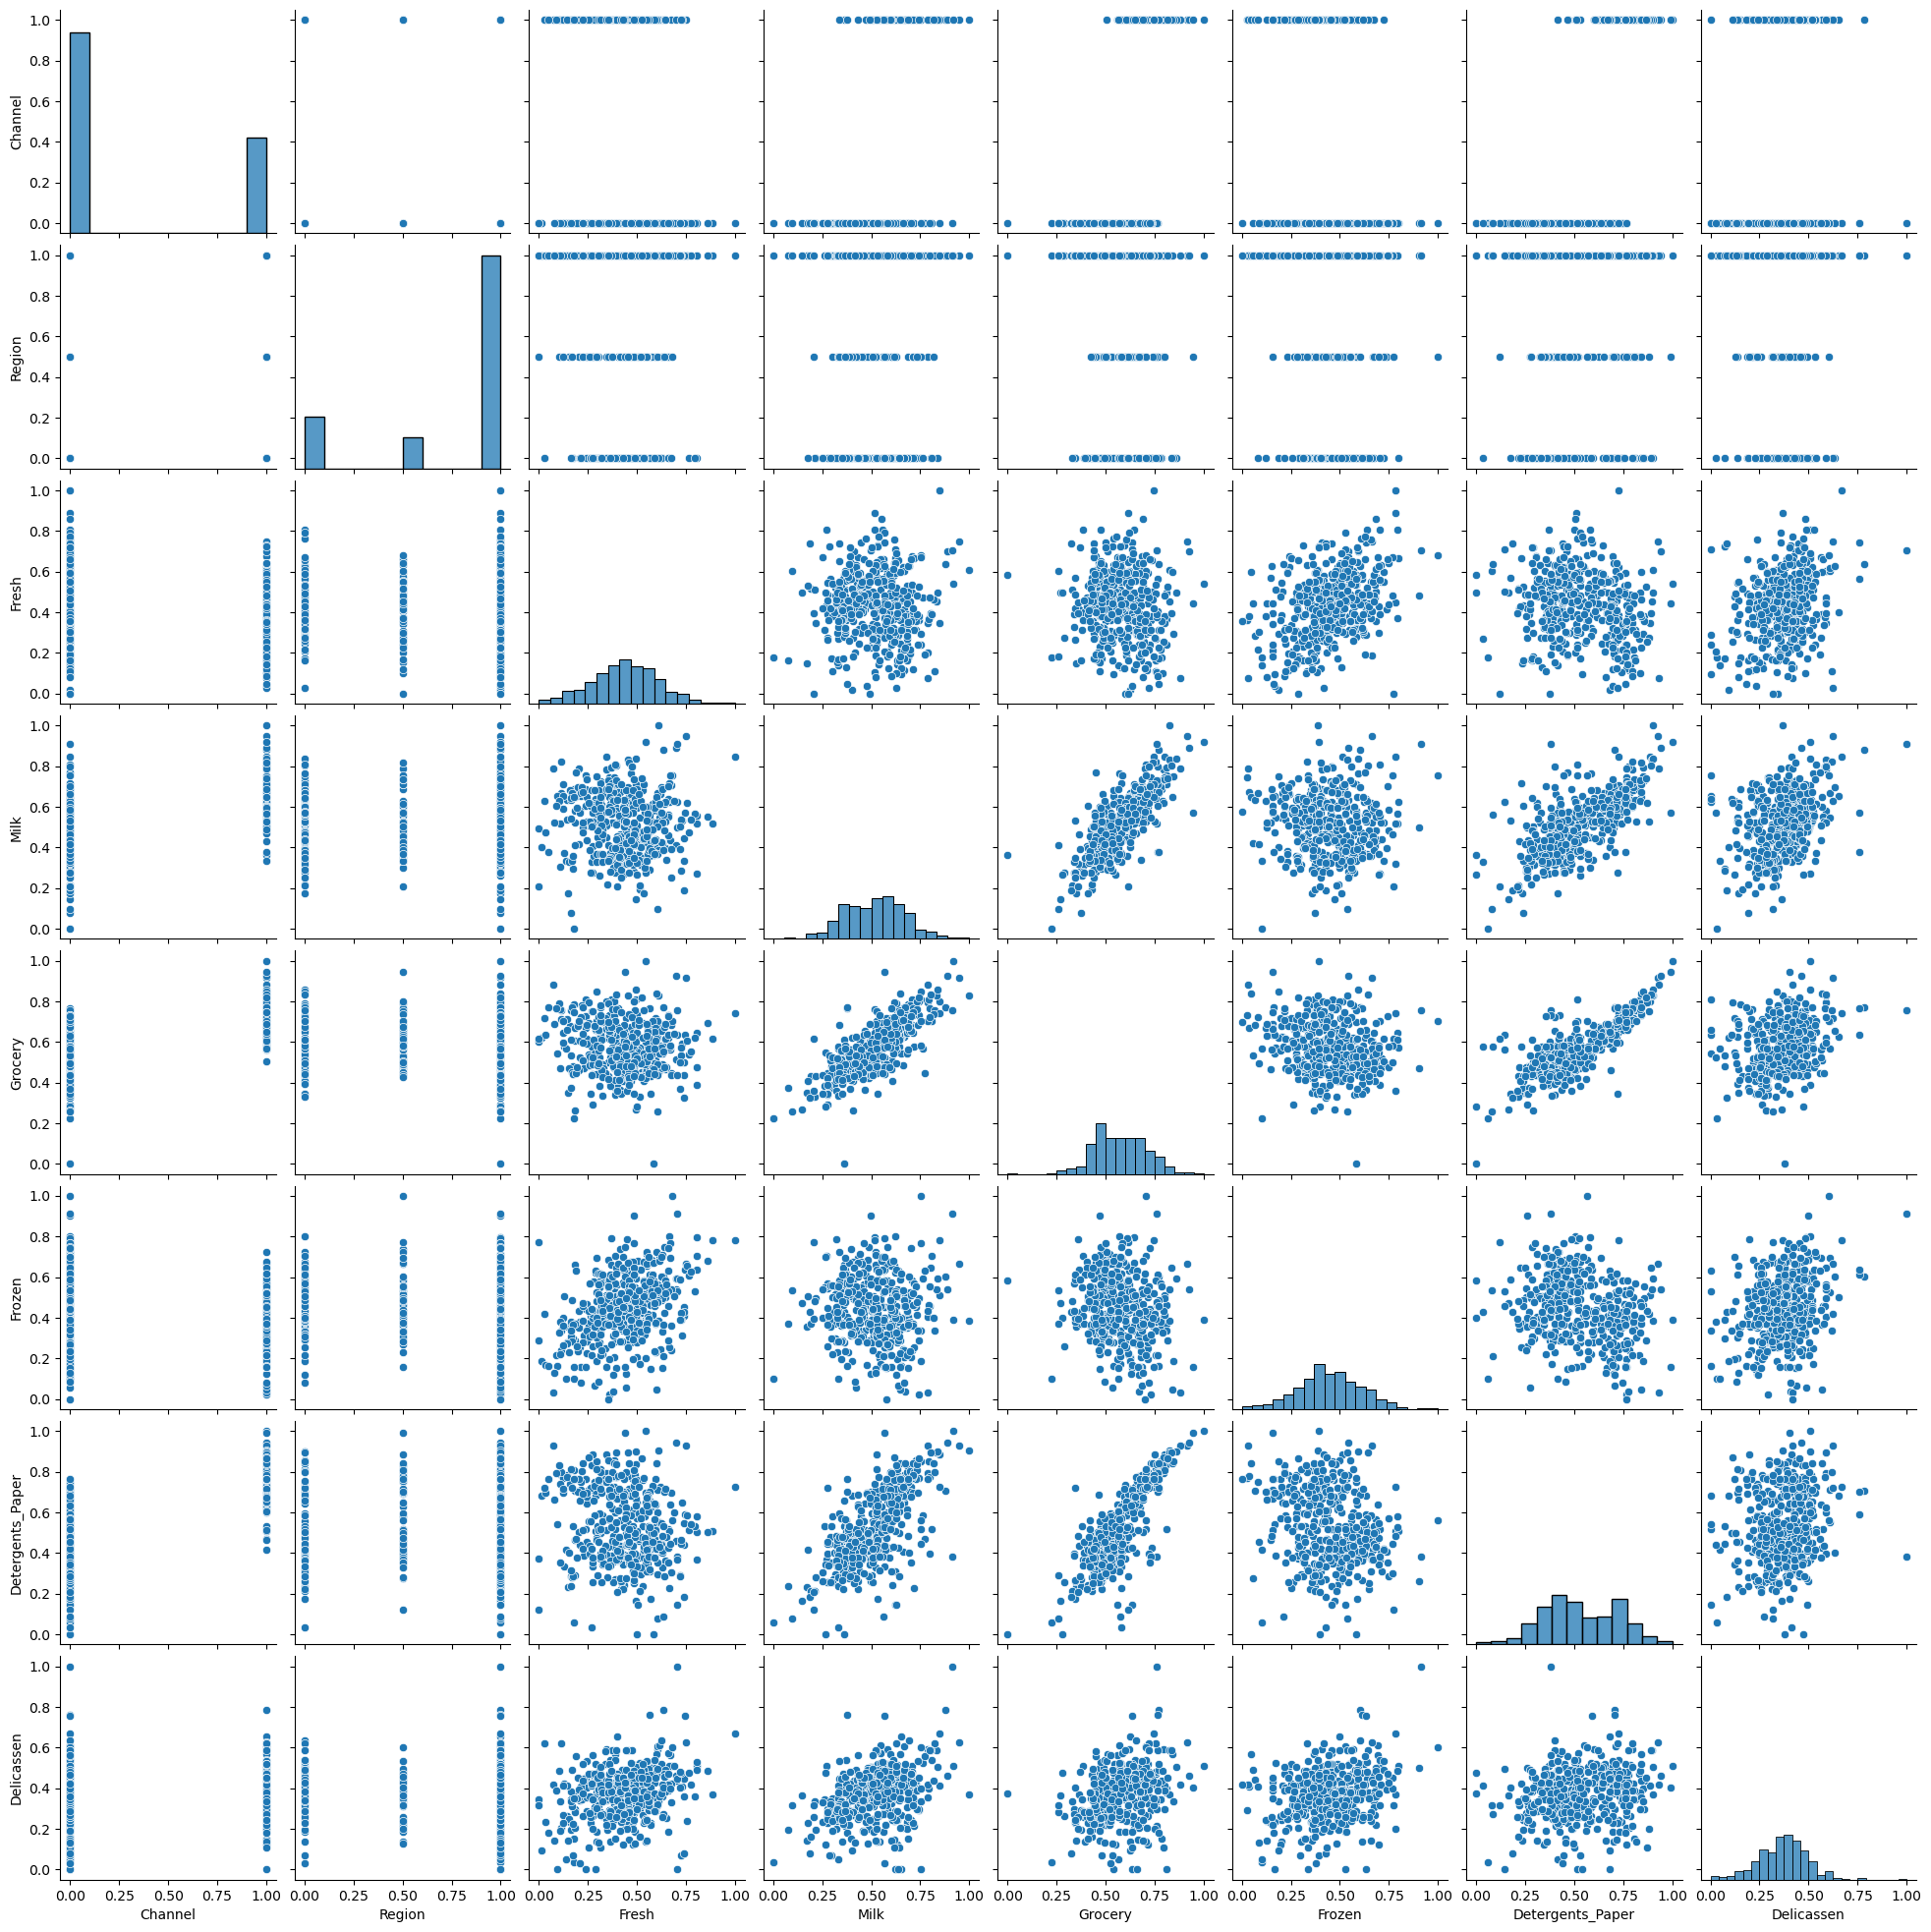

In [15]:
import seaborn as sns
sns.pairplot(X);
plt.show()

In [20]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = list(range(2,11)) # set the range of k values to test 
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))
inertias_km = []
silhouette_scores_km = []

for i in range(len(pg)):
    km = KMeans(n_clusters=pg[i]['n_clusters'], random_state=random_state)
    y_km = km.fit_predict(X)
    inertias_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X, y_km))

c:\Users\richy\anaconda3\envs\MLDM2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\richy\anaconda3\envs\MLDM2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\richy\anaconda3\envs\MLDM2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\richy\anaconda3\envs\MLDM2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: User

In [22]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

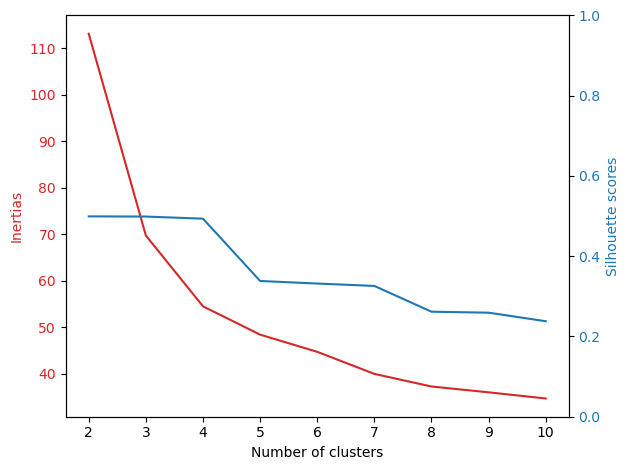

In [23]:
two_plots(x=k_range, y1=inertias_km, y2=silhouette_scores_km
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

In [24]:
k=4
km = KMeans(n_clusters=k, 
            random_state=random_state)
y_km = km.fit_predict(X)
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k,inertias_km[k_range.index(k)],silhouette_scores_km[k_range.index(k)]))

Number of clusters = 4	- Distortion =  54.49	- Silhouette score = 0.49


c:\Users\richy\anaconda3\envs\MLDM2526\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


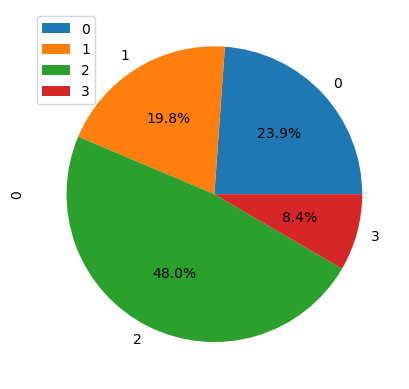

In [31]:
clust_sizes_km = np.unique(y_km,return_counts=True)
pd.DataFrame(clust_sizes_km[1]).plot.pie(y=0, autopct='%1.1f%%', );
plt.show()